In [294]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import stats
import numpy
import seaborn as sns
import statsmodels.api as sm

In [3]:
%matplotlib inline

In [4]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

# Importing Data

In [57]:
listings = pd.read_csv("listings.csv")
listings = listings[['city', 'metropolitan', 'price', 'state', 'availability_30', 'instant_bookable', 'zipcode']]
listings = listings.loc[listings['city'].isin(['san francisco', 'oakland', 'san diego', 'santa cruz', 
                                            'seattle', 'portland', 'los angeles' ])]

/Users/stephen/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
venues = pd.read_csv("venueszip_clean.csv")
venues = venues.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)
venues.city.unique()

array(['los angeles', 'oakland', 'san francisco', 'san diego',
       'santa cruz', 'seattle', 'portland'], dtype=object)

In [125]:
econ_data = pd.read_csv("econ_state.csv")
econ_data = econ_data.loc[econ_data['state'].isin(['CA', 'WA', 'OR'])]

In [176]:
demographic = pd.read_csv("demographics.csv")


In [177]:
demographic.city.unique()

array(['Abbeville', 'Abbotsford', 'Aberdeen', ..., 'Zimmerman',
       'Zumbrota', 'Zuni Pueblo'], dtype=object)

In [181]:
demographic = demographic.loc[demographic['state'].isin(['WA', 'CA', 'OR']) ]


In [183]:
demographic = demographic.loc[demographic['city'].isin(['Seattle', 'San Francisco--Oakland', 'Portland', 
                                                         'Los Angeles--Long Beach--Anaheim', 'Santa Cruz', 'San Diego'])]



# Unemployment Rate vs Number of Listings of Airbnb

In [143]:
recent_ur = econ_data['2016/12_ur']
print(recent_ur)

4     5.2
37    4.5
47    5.1
Name: 2016/12_ur, dtype: float64


In [144]:
listings_state_count = listings.groupby('state').price.agg(['count'])['count']
print(listings_state_count)

state
CA    36468
OR     3541
WA     3814
Name: count, dtype: int64


In [145]:
print("unemployment rate vs number of listings")
print(numpy.corrcoef(list(recent_ur), list(listings_state_count)))

unemployment rate vs number of listings
[[1.         0.61569165]
 [0.61569165 1.        ]]


# EDA venue count and restarurant count vs number of Airbnbs

In [13]:
venues_count = venues.groupby('city').types.agg(['count'])['count']
print(venues_count)

city
los angeles      23598
oakland           5809
portland          7504
san diego         5583
san francisco    26666
santa cruz         534
seattle          12684
Name: count, dtype: int64


In [24]:
'point_of_interest' in venues['types'][0]

True

In [42]:
venues_poi = venues[venues['types'].str.contains("point_of_interest")]
venues_res = venues[venues['types'].str.contains("restaurant")]

In [118]:
venues_res.to_csv("restaurant_data.csv")

In [43]:
print(venues_poi.shape)
print(venues_res.shape)
print(venues.shape)

(82378, 16)
(17887, 16)
(82378, 16)


In [46]:
venues_res_count = venues_res.groupby('city').types.agg(['count'])['count']
print(venues_res_count)

city
los angeles      6231
oakland          1055
portland         1759
san diego        1149
san francisco    4763
santa cruz         91
seattle          2839
Name: count, dtype: int64


In [50]:
def price_to_float (price):
    price = str(price)
    return float(price.strip("$").replace(",", ""))

listings['price'] = listings['price'].apply(price_to_float)

In [261]:
listings_count = listings.groupby('city').price.agg(['count'])['count']
print(listings_count)

city
los angeles      19515
oakland           1611
portland          3541
san diego         6207
san francisco     8684
santa cruz         451
seattle           3814
Name: count, dtype: int64


In [85]:
print("number of restaurants vs listings")
print(numpy.corrcoef(venues_res_count, listings_count))
# Pearson Correlation between number of venues and number of listings. 
print("number of venues vs listings")
print(numpy.corrcoef(venues_count, listings_count))

number of restaurants vs listings
[[1.         0.89652001]
 [0.89652001 1.        ]]
number of venues vs listings
[[1.         0.77511564]
 [0.77511564 1.        ]]


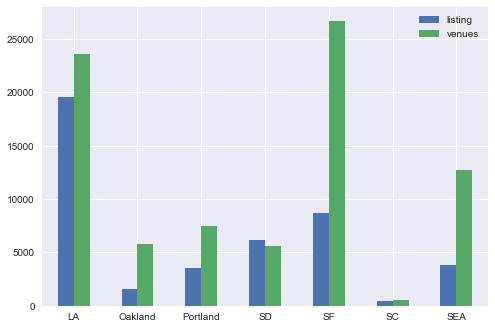

In [302]:
index = ['LA', 'Oakland', 'Portland', 'SD',
         'SF', 'SC', 'SEA']
df = pd.DataFrame({'venues': list(venues_count),
                    'listing': list(listings_count)}, index=index)
ax = df.plot.bar(rot=0)

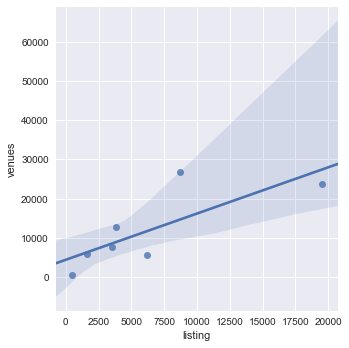

In [303]:
sns.lmplot(x='listing',y='venues',data=df,fit_reg=True) 

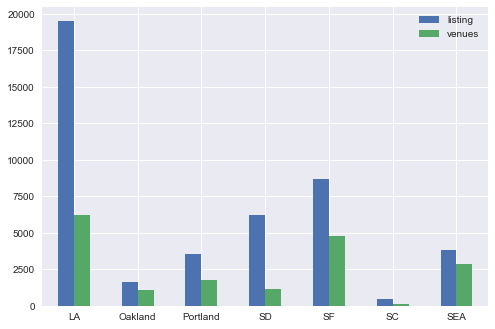

In [299]:
index = ['LA', 'Oakland', 'Portland', 'SD',
         'SF', 'SC', 'SEA']
df = pd.DataFrame({'venues': list(venues_res_count),
                    'listing': list(listings_count)}, index=index)
ax = df.plot.bar(rot=0)

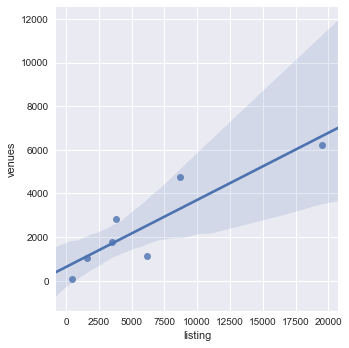

In [301]:
sns.lmplot(x='listing',y='venues',data=df,fit_reg=True) 

In [298]:
model = sm.OLS(df['venues'], df['listing']).fit()
predictions = model.predict(df['listing']) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 venues   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.45
Date:                Sat, 27 Oct 2018   Prob (F-statistic):           0.000274
Time:                        14:40:11   Log-Likelihood:                -58.338
No. Observations:                   7   AIC:                             118.7
Df Residuals:                       6   BIC:                             118.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
listing        0.3600      0.048      7.579      0.0

/Users/stephen/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n))


#### Conclusion

89.7 pearson correlation between number of restaurants and number of airbnb listings

77.5 pearson correlation between number of venues and number of airbnb listings


# Unique Venue Types

Testing correlation between different types and number of airbnb listings

In [74]:
venues.types.unique()

array(["['restaurant', 'food', 'point_of_interest', 'establishment']",
       "['cafe', 'food', 'store', 'point_of_interest', 'establishment']",
       "['cafe', 'restaurant', 'food', 'point_of_interest', 'establishment']",
       "['lodging', 'point_of_interest', 'establishment']",
       "['museum', 'point_of_interest', 'establishment']",
       "['park', 'point_of_interest', 'establishment']",
       "['hair_care', 'beauty_salon', 'spa', 'point_of_interest', 'establishment']",
       "['hair_care', 'beauty_salon', 'spa', 'health', 'point_of_interest', 'establishment']",
       "['spa', 'point_of_interest', 'establishment']",
       "['bus_station', 'transit_station', 'point_of_interest', 'establishment']",
       "['car_rental', 'point_of_interest', 'establishment']",
       "['transit_station', 'point_of_interest', 'establishment']",
       "['bar', 'point_of_interest', 'establishment']",
       "['aquarium', 'point_of_interest', 'establishment']",
       "['rv_park', 'lodging', 'p

In [218]:
venues_cafe = venues[venues['types'].str.contains("cafe")]
print(venues_cafe.shape)
venues_cafe_count = venues_cafe.groupby('city').types.agg(['count'])['count']
print(venues_cafe_count)

venues_spa = venues[venues['types'].str.contains("spa")]
print(venues_spa.shape)
venues_spa_count = venues_spa.groupby('city').types.agg(['count'])['count']
print(venues_spa_count)

(5849, 16)
city
los angeles      1297
oakland           776
portland          473
san diego         258
san francisco    1984
santa cruz         28
seattle          1033
Name: count, dtype: int64
(1718, 16)
city
los angeles      684
oakland          135
portland          12
san diego        162
san francisco    480
santa cruz         9
seattle          236
Name: count, dtype: int64


In [219]:
print("Number of cafes vs number of listings")
print(numpy.corrcoef(venues_cafe_count, listings_count))
print("Number of spas vs number of listings")
print(numpy.corrcoef(venues_spa_count, listings_count))

Number of cafes vs number of listings
[[1.      0.55485]
 [0.55485 1.     ]]
Number of spas vs number of listings
[[1.         0.91935881]
 [0.91935881 1.        ]]


# Median and Mean Household Income of Demographic vs. Listings of Airbnbs

In [187]:
demographic.head(7)

,city,state,population,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,60-64_years,65-74_years,75-84_years,85_years_or_more,households,"$9,999_or_less","$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
1887,Los Angeles--Long Beach--Anaheim,CA,12460016,787946,773404,795363,862672,974812,1916515,1757165,1723945,755975,625510,821184,455767,209758,6305104,2.1,5.1,17.2,15.2,17.3,12.9,5.8,10.1,14.3,29651,29651
2608,Portland,OR,1935090,121077,126627,119264,115305,122503,307110,291742,261311,122603,112913,136512,64768,33355,1045817,1.6,2.8,11.6,15.5,20.3,15.3,7.1,11.7,14.1,32086,32086
2861,San Diego,CA,3080269,202149,191668,185592,203858,260317,496204,411737,408521,183206,159304,205891,115308,56514,1574338,1.8,3.4,13.2,15.1,18.4,13.8,6.8,11.6,15.8,32814,32814
2869,San Francisco--Oakland,CA,3421770,195228,187551,177155,179840,221435,572386,512192,483526,223921,203702,256031,139118,69685,1883244,1.4,2.5,8.9,10.9,16.0,14.2,6.9,12.9,26.2,41432,41432
2881,Santa Cruz,CA,168236,7411,7938,8493,15249,19876,19933,19742,22771,13188,11407,13254,5976,2998,94335,1.6,3.6,8.3,12.2,15.5,13.9,7.5,14.0,23.3,31036,31036
2915,Seattle,WA,3223799,207129,197733,191819,188401,223738,525583,466363,453306,209168,179240,218587,108257,54475,1785505,1.3,2.0,9.3,12.9,18.5,15.4,7.7,13.2,19.8,38662,38662


In [247]:
list(demographic['mean_household_income'])

[29651, 32086, 32814, 41432, 31036, 38662]

In [262]:
demo_listings_count = listings.groupby('city').price.agg(['count'])['count']

In [263]:
demo_listings_count['san francisco'] = listings_count['oakland'] + listings_count['san francisco']

In [264]:
demo_listings_count

city
los angeles      19515
oakland           1611
portland          3541
san diego         6207
san francisco    10295
santa cruz         451
seattle           3814
Name: count, dtype: int64

In [265]:
demo_listings_count = list(demo_listings_count)

In [266]:
demo_listings_count

[19515, 1611, 3541, 6207, 10295, 451, 3814]

In [267]:
demo_listings_count.pop(1)
print(demo_listings_count)

[19515, 3541, 6207, 10295, 451, 3814]


In [268]:
numpy.corrcoef(list(demographic['mean_household_income']), demo_listings_count)

array([[ 1.       , -0.1149927],
       [-0.1149927,  1.       ]])

In [ ]:
index = ['LA', 'Portland', 'SD',
         'SF-Oakland', 'SC', 'SEA']
df = pd.DataFrame({'listings': list(demo_listings_count),
                    'mean income': list(demographic['mean_household_income'])}, index=index)
ax = df.plot.bar(rot=0)

In [295]:
model = sm.OLS(df['mean income'], df['listings']).fit()
predictions = model.predict(df['listings']) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            mean income   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     6.274
Date:                Sat, 27 Oct 2018   Prob (F-statistic):             0.0542
Time:                        14:38:55   Log-Likelihood:                -68.774
No. Observations:                   6   AIC:                             139.5
Df Residuals:                       5   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
listings       2.6852      1.072      2.505      0.0

/Users/stephen/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


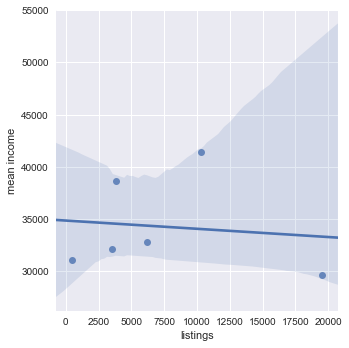

In [285]:
sns.lmplot(x='listings',y='mean income',data=df,fit_reg=True) 


In [ ]:
index = ['LA', 'Portland', 'SD',
         'SF-Oakland', 'SC', 'SEA']
df = pd.DataFrame({'listings': list(demo_listings_count),
                    'median income': list(demographic['median_household_income'])}, index=index)
ax = df.plot.scatter(x='listings',y='median income')

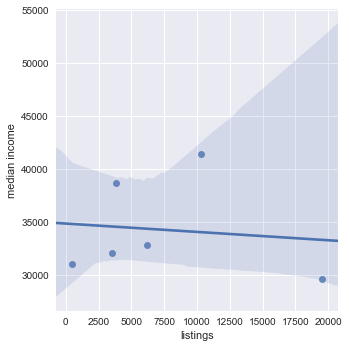

In [283]:
sns.lmplot(x='listings',y='median income',data=df,fit_reg=True) 

# Conclusion

No correlation between mean & median income and listings of airbnbs